In [1]:
import numpy as np
import math
from Genetic import GA
from scipy.optimize import minimize, Bounds
from scipy.optimize import OptimizeResult
import matplotlib.pyplot as plt
import sys
import time

# Определение функций

In [2]:
# Функция Растригина
def rastrigin_function(X):

    dim=len(X)         

    OF=0
    for i in range (0,dim):
        OF+=(X[i]**2)-10*math.cos(2*math.pi*X[i])+10

    return OF

def sphere(X):
    return sum(x**2)

rastrigin_varbound=np.array([[-5.12,5.12]]*2)

In [3]:
from statistics import mean
from statistics import variance

def f1(X):
    res = rastrigin_function(X)
    return res 

In [4]:
def progress(count, total, status=''):
    bar_len = 50
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '|' * filled_len + '_' * (bar_len - filled_len)

    sys.stdout.write('\r%s %s%s/%s %s' % (status, bar, count, total, 'итераций'))
    sys.stdout.flush()  

In [5]:
xs = [[0,0],[0,1],[0.2,0.2],[0.5,0],[0.5,0.5],[0.1,0.1]]

# Функция, которая будет вызываться при каждой итерации
def callbackF(X):    
    function_results.append(f1(X))

In [6]:
for x0 in xs:
    function_results = []
    model = minimize(f1, x0, method='Nelder-Mead', bounds=rastrigin_varbound, callback=callbackF)
    print("Начальные значения переменных: ", x0)
    print("Итогове значение функции соответствия: ", model.fun)
    print("Дисперсия значений целевой функции: ", variance(function_results))
    print("Математическое ожидание значений целевой функции: ", mean(function_results))
    print("Количество итераций: ", len(function_results),"\n")

Начальные значения переменных:  [0, 0]
Итогове значение функции соответствия:  0.0
Дисперсия значений целевой функции:  0.0
Математическое ожидание значений целевой функции:  0.0
Количество итераций:  3 

Начальные значения переменных:  [0, 1]
Итогове значение функции соответствия:  0.9949594159327173
Дисперсия значений целевой функции:  3.2591405304835924e-06
Математическое ожидание значений целевой функции:  0.995747907512137
Количество итераций:  14 

Начальные значения переменных:  [0.2, 0.2]
Итогове значение функции соответствия:  2.765520434877544e-07
Дисперсия значений целевой функции:  20.56183237006442
Математическое ожидание значений целевой функции:  2.36614039008298
Количество итераций:  32 

Начальные значения переменных:  [0.5, 0]
Итогове значение функции соответствия:  0.9949590737845373
Дисперсия значений целевой функции:  31.56705374896475
Математическое ожидание значений целевой функции:  3.23686160390494
Количество итераций:  33 

Начальные значения переменных:  [0.5

In [7]:
# Параметры генетического алгоритма
max_num_iterations = range(70, 150, 50)
population_size = range(70, 150, 50)
mutation_probability = range(10, 100, 30)
crossover_probability = range(10, 100, 30)

total_runs = len(max_num_iterations) * len(population_size) * len(mutation_probability) * len(crossover_probability)
print("Всего итераций: ",total_runs)

Всего итераций:  36


In [43]:
params_dict = {}
best_variance = 0.0
current_run = 1

for iters in max_num_iterations:
    for size in population_size:
        for m_prob in mutation_probability:
            for c_prob in crossover_probability:
                algorithm_param = {'max_num_iteration': iters,
                                   'population_size': size,
                                   'mutation_probability': m_prob / 100.00,
                                   'elit_ratio': 0.01,
                                   'crossover_probability': c_prob / 100.00,
                                   'parents_portion': 0.3,
                                   'crossover_type': 'uniform',
                                   'max_iteration_without_improv': None}
                model=GA(function=f1,
                         dimension=2,
                         variable_type='real',
                         variable_boundaries=rastrigin_varbound,
                         progress_bar=False, 
                         convergence_curve=False,
                         algorithm_parameters=algorithm_param)

                model.run()
                progress(current_run, total_runs, "Прогресс: ")
                current_run += 1
                if variance(model.report) < best_variance or best_variance == 0.0:
                    best_variance = variance(model.report)
                    params_dict["max_num_iteration"]=iters
                    params_dict["population_size"]=size
                    params_dict["mutation_probability"]=m_prob / 100.00
                    params_dict["crossover_probability"]=c_prob / 100.00

Прогресс:  ||||||||||||||||||||||||||||||||||||||||||||||||||36/36 итераций

In [44]:
print("\nЛучшее значение дисперсии: ", best_variance)
print("\nЗначения параметров: ")
for key in params_dict.keys():
    print(key,": ",params_dict[key])


Лучшее значение дисперсии:  0.1664687670681339

Значения параметров: 
max_num_iteration :  70
population_size :  70
mutation_probability :  0.4
crossover_probability :  0.7


 The best solution found:                                                                           
 [-0.00024451 -0.00517632]

 Objective function:
 0.005327171441011913


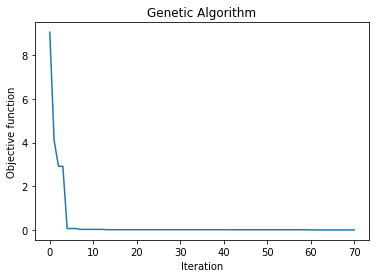

In [45]:
algorithm_param = {'max_num_iteration': 70,
                   'population_size': 70,
                   'mutation_probability': 0.4,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.7,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

model=GA(function=f1,
         dimension=2,
         variable_type='real',
         variable_boundaries=varbound,
         progress_bar=True, 
         algorithm_parameters=algorithm_param)

model.run()

In [46]:
print("Дисперсия значений целевой функции: ", variance(model.report))
print("Математическое ожидание значений целевой функции: ", mean(model.report))

Дисперсия значений целевой функции:  1.5723755232146404
Математическое ожидание значений целевой функции:  0.2830018910374578


In [26]:
arr=[0,1,1,10]

print("Дисперсия: ", variance(arr))
print("Математическое ожидание: ", mean(arr))

Дисперсия:  22
Математическое ожидание:  3


### Определим время, требуемое для получения априори известного значения глобального экстремума оптимизируемой функции

In [21]:
# Функция для поиска априори известного значения
def f2(X):
    res = rastrigin_function(X)
    if res < 0.01:
        res = 0
    return res

К сожалению, GA не находит точное значение экстремума (значение имеет погрешность около 0,01), поэтому в функции f2 априорное значение определено как промежуток вещественных чисел от 0 до 0,01

In [30]:
algorithm_param = {'max_num_iteration': 150,
                   'population_size': 100,
                   'mutation_probability': 0.2,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.3,
                   'parents_portion': 0.4,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': 2}

model=GA(function=f2,
         dimension=2,
         variable_type='real',
         variable_boundaries=rastrigin_varbound,
         progress_bar=False, 
         convergence_curve=False,
         algorithm_parameters=algorithm_param)
result = 1
while int(result) != 0:
    start = time.time()
    model.run()
    stop = time.time()
    result = model.best_function
print("\n\nВремя: ",stop - start)



Время:  2.442627429962158
